<a href="https://colab.research.google.com/github/Elby2112/CyberSec-Attack-Classification-MLP/blob/main/CyberSec_Attack_Classification_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving ICMP_flood.csv to ICMP_flood.csv
Saving Normal_flood.csv to Normal_flood.csv
Saving SYN_flood.csv to SYN_flood.csv
Saving UDP_flood.csv to UDP_flood.csv


# **Data Preperation**

In [ ]:
import pandas as pd

#Importing SYN_flood dataset
df1 = pd.read_csv("SYN_flood.csv")

#Importing ICMP_flood dataset
df2 = pd.read_csv("ICMP_flood.csv")

#Importing UDP_flood dataset

df3 = pd.read_csv("UDP_flood.csv")

#Importing Normal dataset

df4 = pd.read_csv("Normal_flood.csv")

<ipython-input-2-ebded4835591>:11: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv("UDP_flood.csv")
<ipython-input-2-ebded4835591>:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv("Normal_flood.csv")


In [ ]:
import numpy as np
datasets = [df1, df2, df3, df4]
for dataset in datasets:
    dataset = dataset.replace([np.inf, -np.inf], np.nan)
    df_num = dataset.select_dtypes(include=np.number)
    max_val = df_num.max(skipna=True).max()
    dataset.fillna(max_val + 1, inplace=True)

In [ ]:
df1['Label'] = df1['Label'].replace('SYN_flood', 1)
df2['Label'] = df2['Label'].replace('ICMP_flood', 2)
df3['Label'] = df3['Label'].replace('UDP_flood', 3)
df4['Label'] = df4['Label'].replace('Normal', 4)

In [ ]:
my_dataset = pd.concat([df1, df2, df3, df4], axis=0).sample(frac=1)
my_dataset=my_dataset.dropna()
print(my_dataset.iloc[:10, -2:])

         Idle Min  Label
18111         0.0    4.0
13673  26600000.0    1.0
20298  19100000.0    1.0
4477   52400000.0    1.0
18665         0.0    4.0
191    39600000.0    2.0
19119         0.0    4.0
14076  20600000.0    1.0
19066         0.0    4.0
21292         0.0    1.0


# **Splitting attributs into a list of inputs and an output**
We used  43/78

In [ ]:
X = my_dataset[['RST Flag Cnt', 'Pkt Len Max' , 'Flow IAT Min' ,  'Init Bwd Win Byts', 'Flow IAT Max', 'Bwd IAT Min', 'Subflow Bwd Byts', 'Fwd Pkts/s', 'Flow IAT Mean',
                'Bwd IAT Tot', 'Bwd Pkts/s', 'Pkt Len Min', 'Fwd Seg Size Avg', 'Fwd IAT Min', 'Bwd Header Len', 'Fwd IAT Tot','Flow IAT Std', 'Pkt Size Avg', 'Pkt Len Std',
                'Bwd Seg, Size Avg','Fwd Act Data Pkts', 'Pkt Len Var', 'Idle Min',  'Subflow Fwd Byts', 'PSH Flag Cnt', 'Fwd IAT Max', 'Pkt Len Mean',  'Idle Std',
                'Active Std', 'Bwd IAT Mean', 'Bwd IAT Max', 'Fwd IAT Std', 'Fwd IAT Mean', 'Bwd IAT Std', 'FIN Flag Cnt',  'Fwd Header Len','Active Max', 'Active Min',
                'Active Mean', 'Idle Mean', 'ACK Flag Cnt']]
y = my_dataset['Label']

In [ ]:
X=X.fillna(0)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, alpha=0.0001,
                    solver='adam', verbose=10, random_state=42, tol=0.0001)

In [ ]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 12.82548265
Iteration 2, loss = 10.86015828
Iteration 3, loss = 10.48688244
Iteration 4, loss = 10.46555294
Iteration 5, loss = 10.09554292
Iteration 6, loss = 10.14700628
Iteration 7, loss = 9.98222752
Iteration 8, loss = 9.67819798
Iteration 9, loss = 9.76751511
Iteration 10, loss = 9.62355386
Iteration 11, loss = 9.61441793
Iteration 12, loss = 9.54134294
Iteration 13, loss = 9.43348419
Iteration 14, loss = 9.29500068
Iteration 15, loss = 9.36299344
Iteration 16, loss = 9.45433410
Iteration 17, loss = 9.22585325
Iteration 18, loss = 9.28765419
Iteration 19, loss = 9.03210703
Iteration 20, loss = 9.29131263
Iteration 21, loss = 9.15930639
Iteration 22, loss = 9.15429447
Iteration 23, loss = 9.19175132
Iteration 24, loss = 9.22142490
Iteration 25, loss = 9.09287706
Iteration 26, loss = 9.12053812
Iteration 27, loss = 9.10785571
Iteration 28, loss = 9.31833920
Iteration 29, loss = 9.12042267
Iteration 30, loss = 8.92040985
Iteration 31, loss = 8.97789554
Iteration 3

MLPClassifier(max_iter=500, random_state=42, verbose=10)

In [ ]:
y_pred = mlp.predict(X_test)


In [ ]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)


Accuracy: 0.7624071903087143


Epoch 1/10
32/32 [==============================] - 1s 14ms/step - loss: 0.6998 - accuracy: 0.4930 - val_loss: 0.6833 - val_accuracy: 0.5700
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.5010 - val_loss: 0.6847 - val_accuracy: 0.5400
Epoch 3/10
32/32 [==============================] - 0s 7ms/step - loss: 0.6926 - accuracy: 0.5210 - val_loss: 0.6842 - val_accuracy: 0.5400
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6917 - accuracy: 0.5330 - val_loss: 0.6849 - val_accuracy: 0.5200
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.5340 - val_loss: 0.6856 - val_accuracy: 0.5100
Epoch 6/10
32/32 [==============================] - 0s 7ms/step - loss: 0.6904 - accuracy: 0.5390 - val_loss: 0.6845 - val_accuracy: 0.5800
Epoch 7/10
32/32 [==============================] - 1s 18ms/step - loss: 0.6902 - accuracy: 0.5340 - val_loss: 0.6864 - val_accuracy: 0.5700
Epoch 8/10
32/32 [

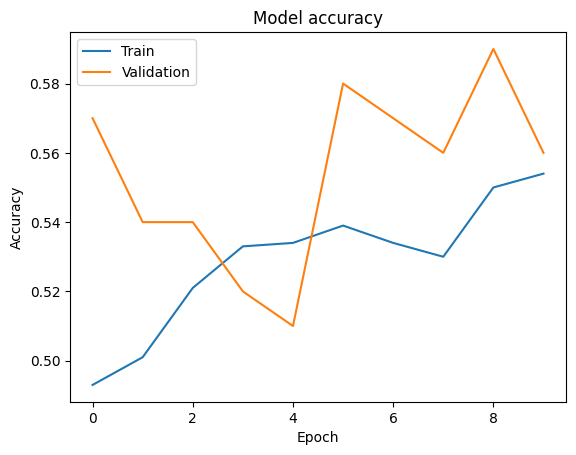

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
import matplotlib.pyplot as plt
import numpy as np

# Define your MLP model
model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define training and validation data
X_train = np.random.rand(1000, 10)
y_train = np.random.randint(0, 2, size=(1000,))
X_val = np.random.rand(100, 10)
y_val = np.random.randint(0, 2, size=(100,))

# Train the model
history = History()
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[history])

# Plot the accuracy values over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix


array([[4814,    4,  102,   11],
       [  25,  285,   70,  132],
       [ 125,  211, 1173, 1742],
       [ 116,  202,  300, 3483]])

<Axes: >

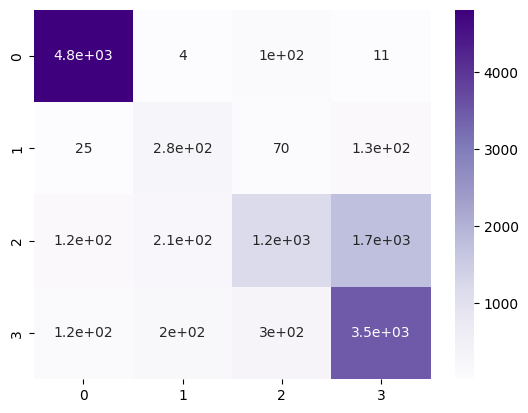

In [ ]:
import seaborn as sns

# plot confusion matrix as a heatmap
sns.heatmap(cnf_matrix, annot=True, cmap='Purples')
